## Text Mining Project - Kevin, Yuri, Leo, Alberto

In [214]:
import pandas as pd
import numpy as np

train = pd.read_csv('training_set.txt', sep = '\t')
dev = pd.read_csv('dev_set.txt', sep = '\t')


In [215]:
print('training size: ', train.shape)
print('validation size: ', dev.shape)

training size:  (14000, 2)
validation size:  (1000, 2)


In [216]:
train.head(20)

,sentence,emotion
0,I'm too old to be traded in .,6
1,Mother said you could always tell a lady by he...,8
2,I always said I'd leave off when the time came .,6
3,He'll be safe with me .,2
4,Lay off .,1
5,You tell him to take care of you .,8
6,I hope so .,4
7,Why do you want to shut me out in the cold lik...,6
8,"You taught me a lesson , man .",8
9,I'll do everything I can to make a success of ...,2


In [217]:
emotion_dict = {1:'Anger', 2:'Anticipation', 3:'Disgust', 4:'Fear', 5:'Joy', 6:'Sadness', 7:'Surprise', 8:'Trust'}

### Preprocess

In [218]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm

nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [219]:
def preprocessing(dataframe):
    
    processed_corpus = []
    stop_words = set(stopwords.words("english"))
    
    for i in tqdm(range(len(dataframe))):
        text = dataframe['sentence'].iloc[i]
        
        # Remove tags
        text = BeautifulSoup(text).get_text()
        
        # Remove punctuations
        text = re.sub('[^a-zA-Z]', ' ', text)

        # Convert to lowercase
        text = text.lower()        
        
        # Convert to list from string
        text = text.split()

        # Lemmatization
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stop_words] 
        
        # Stemming
        stem = PorterStemmer()
        text = [stem.stem(word) for word in text if not word in stop_words]
        text = ' '.join(text)
        
        processed_corpus.append(text)
        
    return processed_corpus

In [220]:
proctrain = preprocessing(train)
procdev = preprocessing(dev)

C:\Users\Kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/14000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [221]:
proctrain = pd.DataFrame(zip(proctrain, train.emotion), columns = train.columns, index = train.index)
procdev = pd.DataFrame(zip(procdev, dev.emotion), columns = dev.columns, index = dev.index)

In [222]:
df = proctrain.append(procdev)
df.reset_index(drop = False, inplace = True)
df.rename(columns = {'index':'old_index'}, inplace = True)
df = df.sample(frac = 1)

In [223]:
df.tail()

,old_index,sentence,emotion
11549,11549,go,4
14466,466,sure,4
7238,7238,person,6
12868,12868,let cop get away,1
8564,8564,someth wrong,4


In [224]:
from sklearn.model_selection import train_test_split

new_train, new_dev = train_test_split(df, test_size = 0.1, random_state = 2022)

In [225]:
new_train.head()

,old_index,sentence,emotion
3125,3125,let anybodi,4
938,938,get,1
7248,7248,well tell tri call back know,1
3779,3779,tell somethin,1
12461,12461,simpl help knock three four day,2


In [226]:
for i in range(0,len(new_train.sentence)): 
    new_train.sentence.iloc[i] = new_train.sentence.iloc[i].split(' ')

for j in range(0, len(new_dev.sentence)):
    new_dev.sentence.iloc[j] = new_dev.sentence.iloc[j].split(' ')


C:\Users\Kevin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [227]:
train_bag = new_train.explode('sentence')
dev_bag = new_dev.explode('sentence')

In [228]:
train_bag.drop(train_bag.index[list(np.where(train_bag.sentence == ''))], inplace = True)
dev_bag.drop(dev_bag.index[list(np.where(dev_bag.sentence == ''))], inplace = True)

C:\Users\Kevin\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [229]:
train_bag.reset_index(drop = True, inplace = True)
dev_bag.reset_index(drop = True, inplace = True)

In [230]:
train_bag.head()

,old_index,sentence,emotion
0,3125,let,4
1,3125,anybodi,4
2,938,get,1
3,7248,well,1
4,7248,tell,1


In [231]:
dev_bag.tail()

,old_index,sentence,emotion
5122,5589,could,8
5123,5589,get,8
5124,5589,money,8
5125,5589,wait,8
5126,5589,midnight,8


In [232]:
emotion_dict

{1: 'Anger',
 2: 'Anticipation',
 3: 'Disgust',
 4: 'Fear',
 5: 'Joy',
 6: 'Sadness',
 7: 'Surprise',
 8: 'Trust'}

### Encoding

In [233]:
from sklearn import preprocessing
def encoder(input_frame):
    code = pd.Series([0]*len(input_frame.sentence), index = input_frame.index)
    for i in range(0,len(input_frame)):
        word_len = len(input_frame.iloc[i])
        for j in range(0,len(input_frame.sentence.iloc[i])):
            temp = []
            temp.append((ord(input_frame.sentence.iloc[i][j])-97)*(36**(1-word_len))) # base 36 encoding
        
        code.iloc[i] = str(temp)
    
    input_frame['code'] = code.values
    input_frame['code'] = input_frame['code'].apply(lambda x: float(x.replace('[','').replace(']','')))
    
#     for k in range(0, len(input_frame.code)): 
#         input_frame['code'].iloc[k] = input_frame['code'].iloc[k]/input_frame['code'].max() # normalize them to the max, not
# typing this out correctly yet
                   
    return input_frame

In [234]:
train_bag = encoder(train_bag)
dev_bag = encoder(dev_bag)

In [235]:
dev_bag.sample(20)

,old_index,sentence,emotion,code
696,11413,repres,3,0.013889
3567,9686,ladi,2,0.006173
1264,5068,old,3,0.002315
4595,7478,season,3,0.010031
4258,12106,littl,3,0.008488
3206,6757,know,5,0.016975
2488,6372,oh,5,0.005401
4523,5318,tell,1,0.008488
3647,5652,hand,1,0.002315
126,3240,fingerprint,1,0.014660


### TFIDF

In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(df):
    corpus = [row for row in df.sentence]
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)

    return X

### Analysis

In [236]:
print(len(train_bag.sentence.unique())/len(train_bag))
print('% unique training')
print(len(dev_bag.sentence.unique())/len(dev_bag))
print('% unique developing')

0.1156335073860847
% unique training
0.3190949873220207
% unique developing


In [237]:
len(train_bag.sentence.unique())

5182

In [247]:
train_bag.iloc[np.where(train_bag.sentence == 'pictur')]

,old_index,sentence,emotion,code
1852,4224,pictur,1,0.013117
4024,4036,pictur,6,0.013117
7290,5146,pictur,2,0.013117
8994,8602,pictur,1,0.013117
9910,10286,pictur,5,0.013117
13130,9438,pictur,2,0.013117
13447,1414,pictur,1,0.013117
17111,12924,pictur,2,0.013117
20135,8228,pictur,1,0.013117
23390,9357,pictur,5,0.013117


<AxesSubplot:>

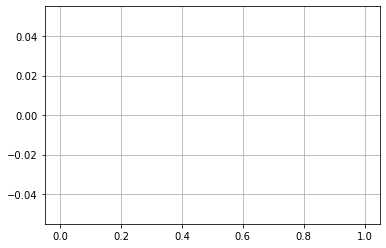

In [200]:
train_bag.emotion.iloc[np.where(train_bag.sentence == 'picture')].hist()